<a href="https://colab.research.google.com/github/yoganand-01/Spring2022/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from datetime import datetime, timedelta
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import math
import numpy as np
from sklearn import metrics




##################date conversion in the data#############################

def data_conversion(days):
    start = datetime.strptime("1900/01/01", "%Y/%m/%d")
    end = start + timedelta(days=days)
    return end.strftime("%Y/%m/%d")

df = pd.read_csv("/content/drive/MyDrive/ML_project/values_normalized.csv")



j=0
for i in df.iloc[:, 0]: 
    date = data_conversion(i) 
    df.iloc[j, 0] = date
    j=j+1
   
    
df.to_csv("/content/drive/MyDrive/ML_project/new_data.csv",index=False)





  

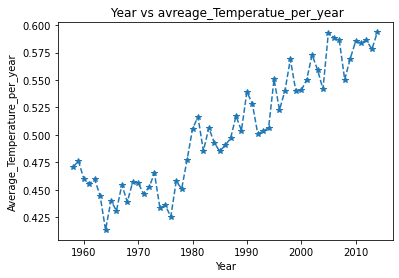

In [8]:
df = pd.read_csv("/content/drive/MyDrive/ML_project/new_data.csv")

df['month'] = pd.DatetimeIndex(df["day"]).month
df['year'] = pd.DatetimeIndex(df["day"]).year

new_df = df.groupby(['year'], as_index=False)['tas'].mean()
month_df= df.groupby(['month'], as_index=False)['tas'].mean()
plt.plot(new_df['year'], new_df['tas'],linestyle='dashed',marker='*')
plt.xlabel('Year')
plt.ylabel('Average_Temperature_per_year')
plt.title(' Year vs avreage_Temperatue_per_year')

plt.show()



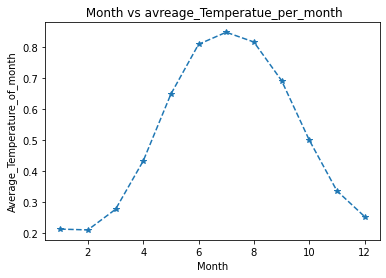

In [9]:
plt.plot(month_df['month'], month_df['tas'],linestyle='dashed',marker='*')
plt.xlabel('Month')
plt.ylabel('Average_Temperature_of_month')
plt.title(' Month vs avreage_Temperatue_per_month')

plt.show()

(20819, 14)


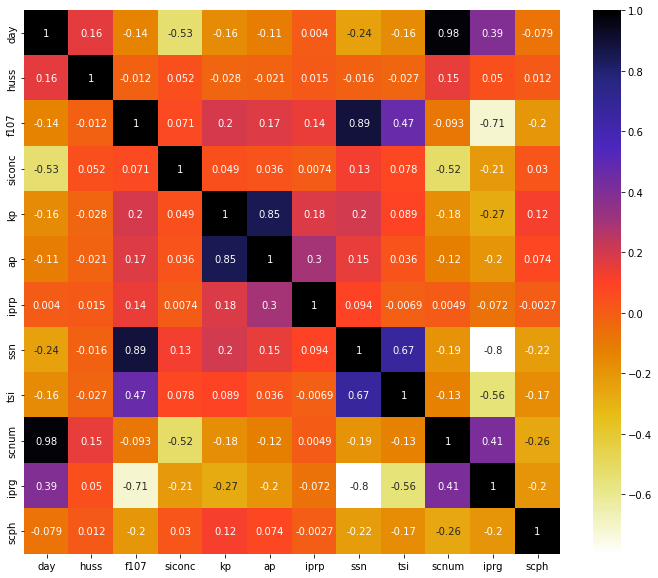

In [20]:
df=pd.read_csv("/content/drive/MyDrive/ML_project/values_normalized.csv")
x = df.drop('tas', axis=1)
x=x.drop('iprm',axis=1)
y = df['tas']

print(df.shape)


#################################corelation matrix########################################
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
plt.figure(figsize=(12,10))
cor=x_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
def model_prediction(x, y, model):
    x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=0)
    model.fit(x_train1, y_train1)
    predicted1 = model.predict(x_test1)
    print('r2-score for the', model, 'is  \n', metrics.r2_score(y_test1, predicted1))


r2_score = []


def k_fold_validation(x, y, model):
    kf = KFold(n_splits=10, random_state=None)
    for train_index, test_index in kf.split(x):
        x_train, x_test = x.iloc[train_index, :], x.iloc[test_index, :]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(x_train, y_train)
        predicted = model.predict(x_test)
        r2_score.append(metrics.r2_score(y_test, predicted))



k_fold_validation(x, y, linear_model.LinearRegression())
print(sum(r2_score) / len(r2_score))
print(r2_score)

model_prediction(x, y,RandomForestRegressor(random_state=1))
model_prediction(x,y,KNeighborsRegressor())

0.8966865829774349
[0.9072245753342839, 0.8752154305899362, 0.8872942035094284, 0.9059940762478852, 0.9085590077398278, 0.9133764749829956, 0.9085136629743465, 0.8991978933982889, 0.8794004353464658, 0.8820900696508917]
r2-score for the RandomForestRegressor(random_state=1) is  
 0.988813390146034
r2-score for the KNeighborsRegressor() is  
 0.9944244008194875


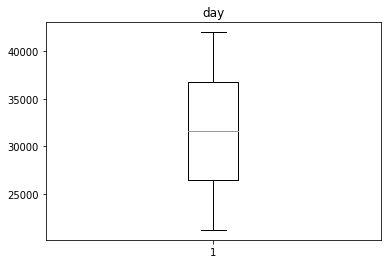

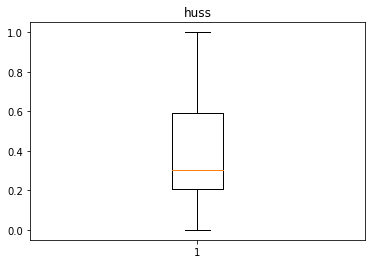

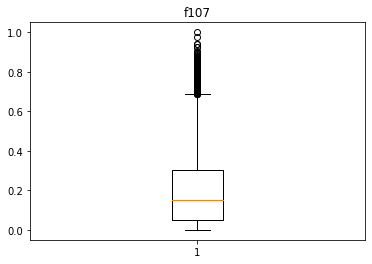

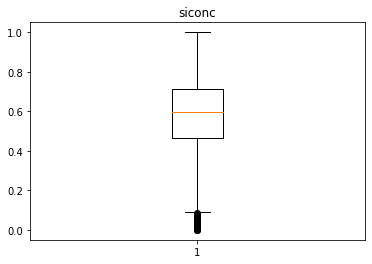

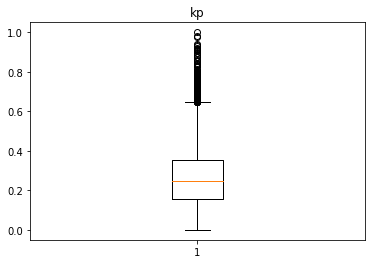

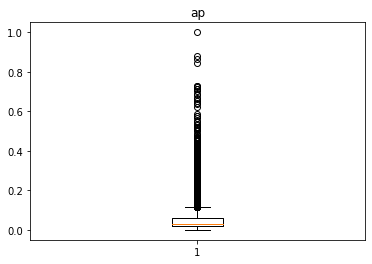

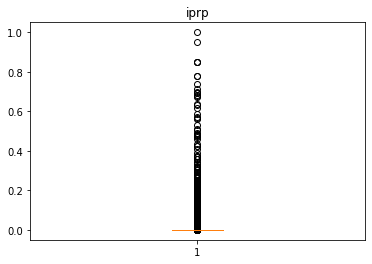

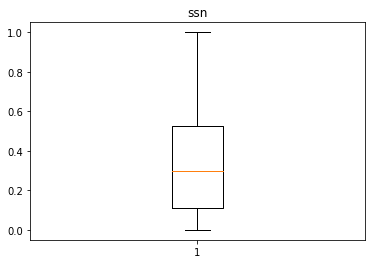

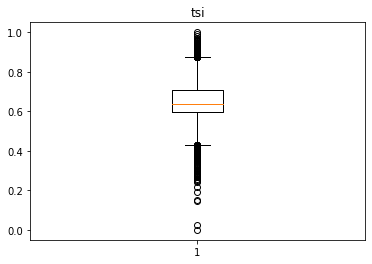

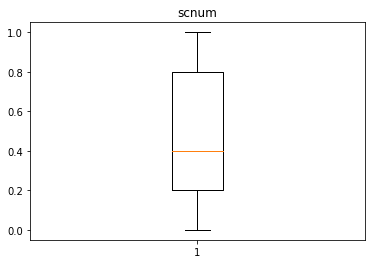

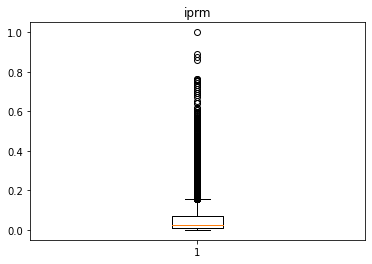

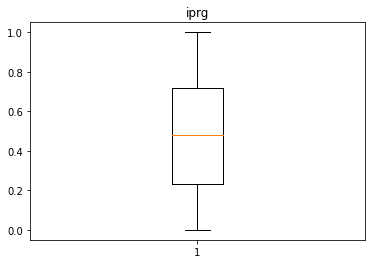

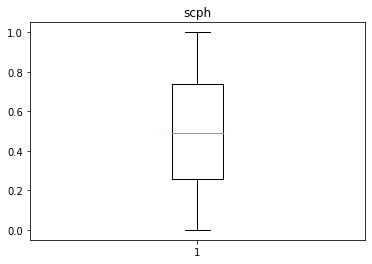

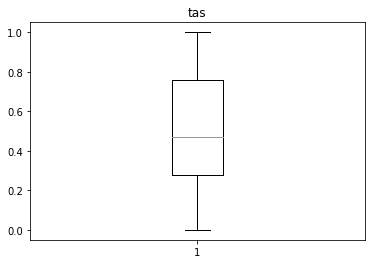

In [12]:

def box_plot(data):
    
    for i in data.columns:
        
        if data[i].dtype != 'object':
        
            plt.figure()
            plt.boxplot(x = data[i])
            plt.title('%s'%i)
            plt.show()

box_plot(df)

In [13]:
# For doing a descriptive analysis, a function is defined count the no of outliers
# the inputs are dataframes types
# here z -score logic is used for detecting outliers, 
# where we are considering values greater than 3 as outliers
import scipy.stats as stats

def outlier_ana_trans(data, z_cutoff = 3, print_out =True):
    
    col_names = ['feature_name','no_outliers','per_outliers']
    
    data_with_outlier_info = pd.DataFrame(columns = col_names)
    
    for i in data.columns:
        
        if data[i].dtype != 'object':
            
            # the z-score is calculated
            z = stats.zscore(data[i])
            
            # the variables outside the boundaries
            z_length = len(z[(z>z_cutoff) | (z<-z_cutoff)])
            
            z_length_per =  round(z_length*100/data.shape[0], 2)
            
            if print_out == True:
                print('\nColumn - %s'%i)

                print('Number of Outlier: ',z_length)

                print('Percentage of the Total: ',z_length_per, '%')
            
            temp_df = pd.DataFrame([[i,z_length,z_length_per]], columns= col_names)
    
            data_with_outlier_info = data_with_outlier_info.append(temp_df)
            
    return data_with_outlier_info

outlier_ana_trans(df,1.5)


Column - day
Number of Outlier:  2790
Percentage of the Total:  13.4 %

Column - huss
Number of Outlier:  2666
Percentage of the Total:  12.81 %

Column - f107
Number of Outlier:  1992
Percentage of the Total:  9.57 %

Column - siconc
Number of Outlier:  3012
Percentage of the Total:  14.47 %

Column - kp
Number of Outlier:  2288
Percentage of the Total:  10.99 %

Column - ap
Number of Outlier:  1182
Percentage of the Total:  5.68 %

Column - iprp
Number of Outlier:  336
Percentage of the Total:  1.61 %

Column - ssn
Number of Outlier:  2531
Percentage of the Total:  12.16 %

Column - tsi
Number of Outlier:  2266
Percentage of the Total:  10.88 %

Column - scnum
Number of Outlier:  4700
Percentage of the Total:  22.58 %

Column - iprm
Number of Outlier:  1588
Percentage of the Total:  7.63 %

Column - iprg
Number of Outlier:  2575
Percentage of the Total:  12.37 %

Column - scph
Number of Outlier:  2985
Percentage of the Total:  14.34 %

Column - tas
Number of Outlier:  1671
Percentag

,feature_name,no_outliers,per_outliers
0,day,2790,13.40
0,huss,2666,12.81
0,f107,1992,9.57
0,siconc,3012,14.47
0,kp,2288,10.99
0,ap,1182,5.68
0,iprp,336,1.61
0,ssn,2531,12.16
0,tsi,2266,10.88
0,scnum,4700,22.58


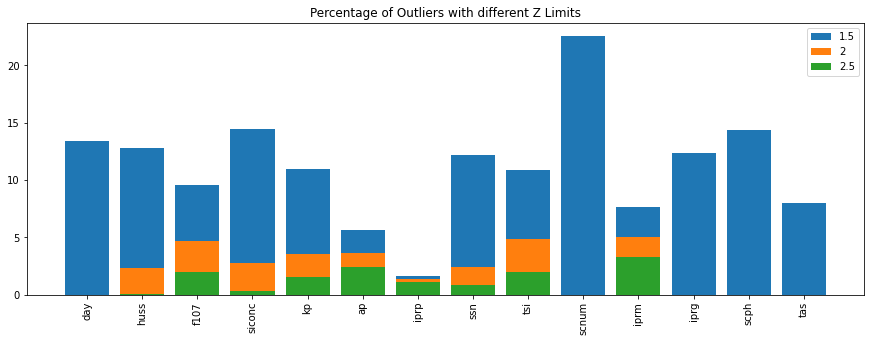

In [14]:
plt.figure(figsize=(15,5))

z_limits = [1.5,2,2.5]

for z_value in z_limits :
    
    temp_df = outlier_ana_trans(df,z_value, False)
    
    plt.bar(temp_df.feature_name,temp_df.per_outliers)
    
    plt.title('Percentage of Outliers with different Z Limits')    
    
    
plt.xticks(rotation = 90)

plt.legend(z_limits)
    
plt.show()


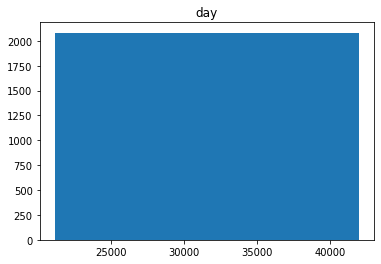

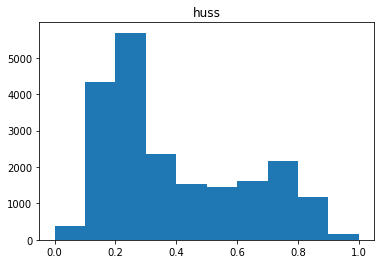

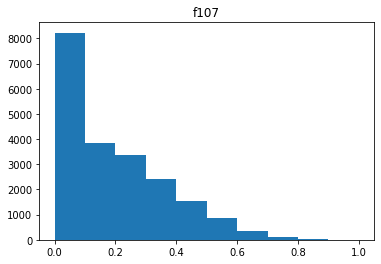

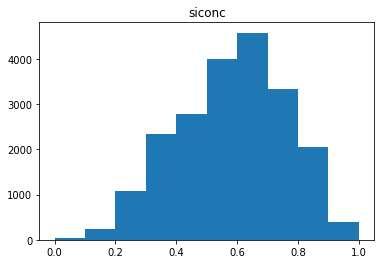

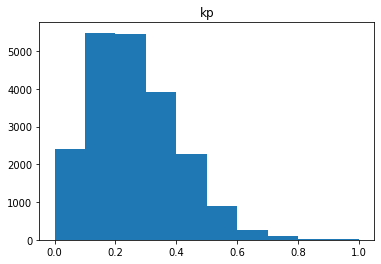

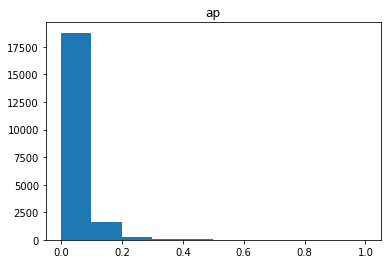

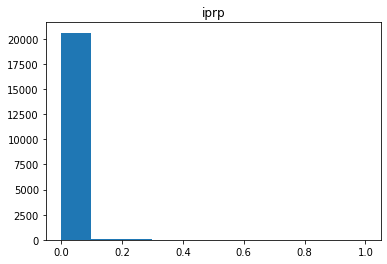

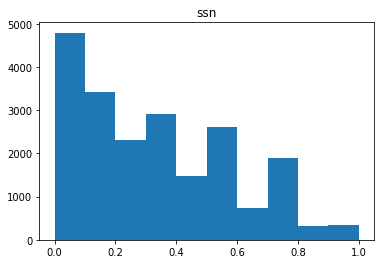

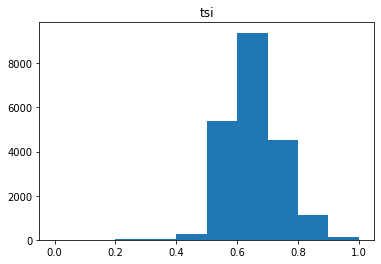

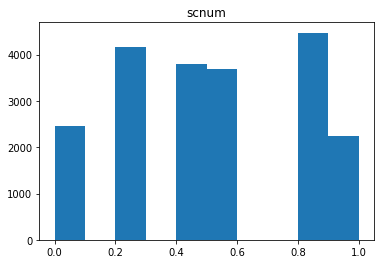

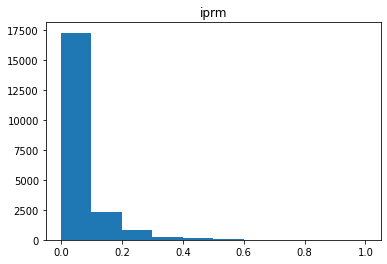

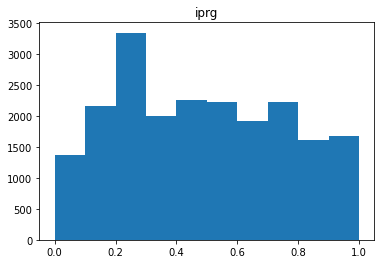

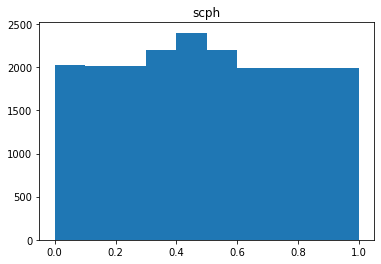

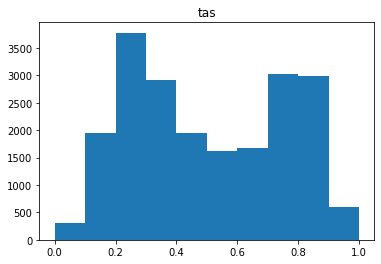

In [15]:
for i in df.columns:
        
        if df[i].dtype != 'object':
        
            plt.figure()
            plt.hist(x = df[i])
            plt.title('%s'%i)

            plt.show() 
            

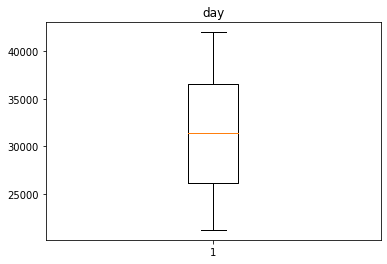

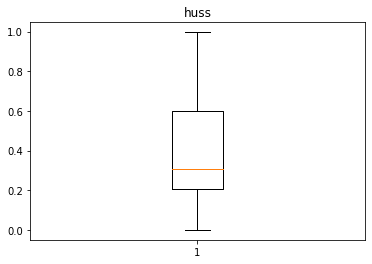

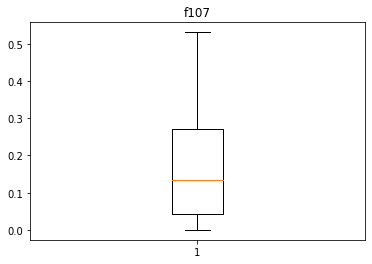

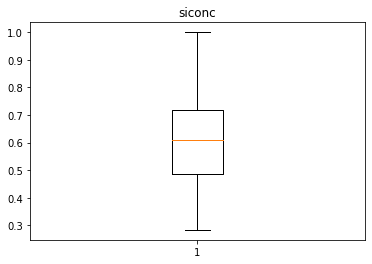

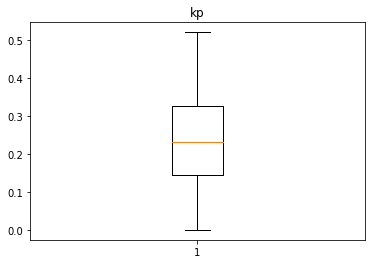

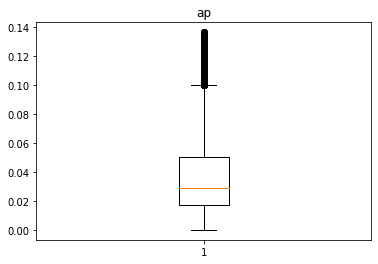

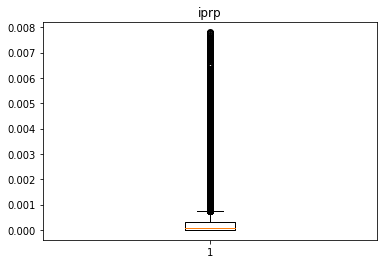

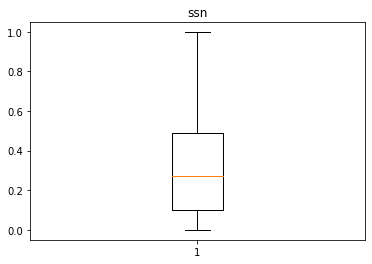

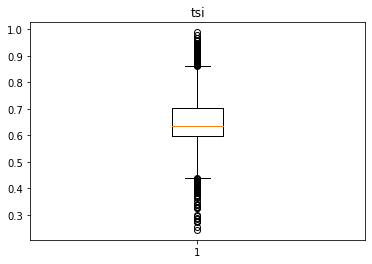

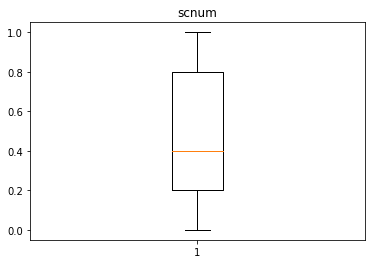

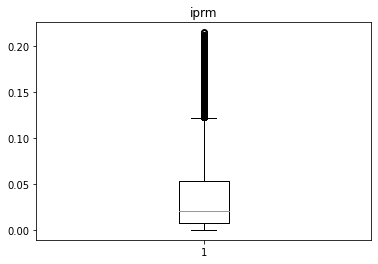

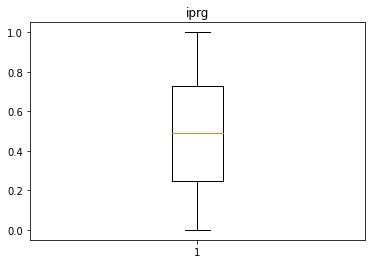

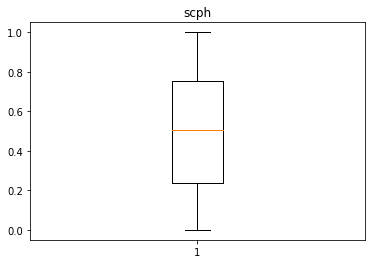

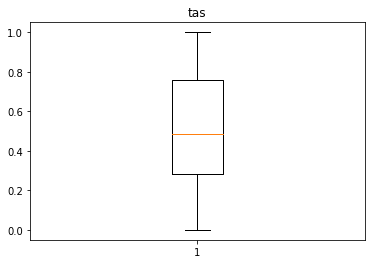

(17114, 14)


In [16]:
max_threshold_f107=df['f107'].quantile(0.95)

max_threshold_siconc=df['siconc'].quantile(0.95)
min_threshld_siconc=df['siconc'].quantile(0.05)
max_threshold_kp=df['kp'].quantile(0.95)
max_threshold_ap=df['ap'].quantile(0.95)
max_threshold_iprp=df['iprp'].quantile(0.95)
max_threshold_iprm=df['iprm'].quantile(0.95)

df=df[(df['f107'] < max_threshold_f107) & (df['siconc'] > min_threshld_siconc ) & (df['kp'] < max_threshold_kp) & (df['ap'] < max_threshold_ap) & (df['iprp'] < max_threshold_iprp) & (df['iprm'] < max_threshold_iprm) ]


box_plot(df)

#plt.scatter(df['day'],df['f107'])

print(df.shape)



In [17]:
import statsmodels.api as stats_models

x = df.drop('tas', axis=1)
y = df['tas']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

log_reg_st = stats_models.Logit(y_train,x_train)
output = log_reg_st.fit()
output.summary()





/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.480558
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    tas   No. Observations:                11979
Model:                          Logit   Df Residuals:                    11966
Method:                           MLE   Df Model:                           12
Date:                Mon, 02 May 2022   Pseudo R-squ.:                  0.3063
Time:                        20:54:58   Log-Likelihood:                -5756.6
converged:                       True   LL-Null:                       -8298.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
day           -0.0002   1.69e-05     -9.670      0.000      -0.000      -0.000
huss           4.6559      0.106     43.911      0.000       4.448       4.864
f107          -0.0340      0.371     -0.092      0.927      -0.761       0.693
siconc         1.7170      0.151     11.339      0.000       1.420       2.014
kp            -0.2237      0.903     -0.248      0.804      -1.993       1.546
ap             1.4165     11.069      0.128      0.898     -20.277      23.111
iprp          -3.4689     23.862     -0.145      0.884     -50.237      43.299
ssn            0.0764      0.308      0.248      0.804      -0.528       0.681
tsi           -0.0303      0.417     -0.073      0.942      -0.847       0.786
scnum          4.0269      0.359     11.230      0.000       3.324       4.730
iprm          -0.2764      4.775     -0.058      0.954      -9.635       9.082
iprg          -0.0547      0.171     -0.320      0.749      -0.390       0.281
scph           0.8799      0.140      6.298      0.000       0.606       1.154
==============================================================================
"""

In [27]:
remove_columns=['f107','kp','ap','iprp','ssn','iprm','iprg','tsi']
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

#df=df.drop(['f107','kp','ap','iprp','ssn','iprm','iprg','tsi'],axis=1) 

x = df.drop('tas', axis=1)
y = df['tas']

df.to_csv("/content/drive/MyDrive/new_data.csv", index=False)

def model_prediction(x, y, model):
    x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=0)
    model.fit(x_train1, y_train1)
    predicted1 = model.predict(x_test1)
    print('r2-score for the', model, 'is  \n', metrics.r2_score(y_test1, predicted1))


model_prediction(x,y,linear_model.LinearRegression())

model_prediction(x,y,RandomForestRegressor(random_state=1))
model_prediction(x,y,KNeighborsRegressor())



r2-score for the LinearRegression() is  
 0.9040980039683311
r2-score for the RandomForestRegressor(random_state=1) is  
 0.9887642852010071
r2-score for the KNeighborsRegressor() is  
 0.9944265152012416


In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
y=np.asarray(y)
y=np.sort(y)
print(y)
print(np.max(y))
print(np.min(y))
# from sklearn.linear_model import LogisticRegression
# for i in range(len(y)):
#     if y[int(i)] >= 0.8:
#         y[int(i)]= int(2)
#     if  y[int(i)] <= 0.6:
#         y[int(i)] = int(0)
#     if  ((y[int(i)] > 0.6) & (y[int(i)] < 0.8)):
#         y[int(i)] = int(1)
# print(np.unique(y))

# def model_prediction(x, y, model):
#     x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=0)
#     model.fit(x_train1, y_train1)
#     predicted1 = model.predict(x_test1)
#     print('accuracy_score for the', model, 'is  \n', accuracy_score(y_test1, predicted1))
#     print ('\n',confusion_matrix(y_test1, predicted1))


# model_prediction(x,y,LogisticRegression())


[0.00000000e+00 6.41227133e-04 6.22681838e-03 ... 9.84723707e-01
 9.97730559e-01 1.00000000e+00]
1.0
0.0
